**Objective: Perform a geographical analysis of the
restaurants in the dataset.**



**Step 1:**Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/Dataset.xlsx")
df = df.dropna()

<ipython-input-2-65cf82d143c9>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


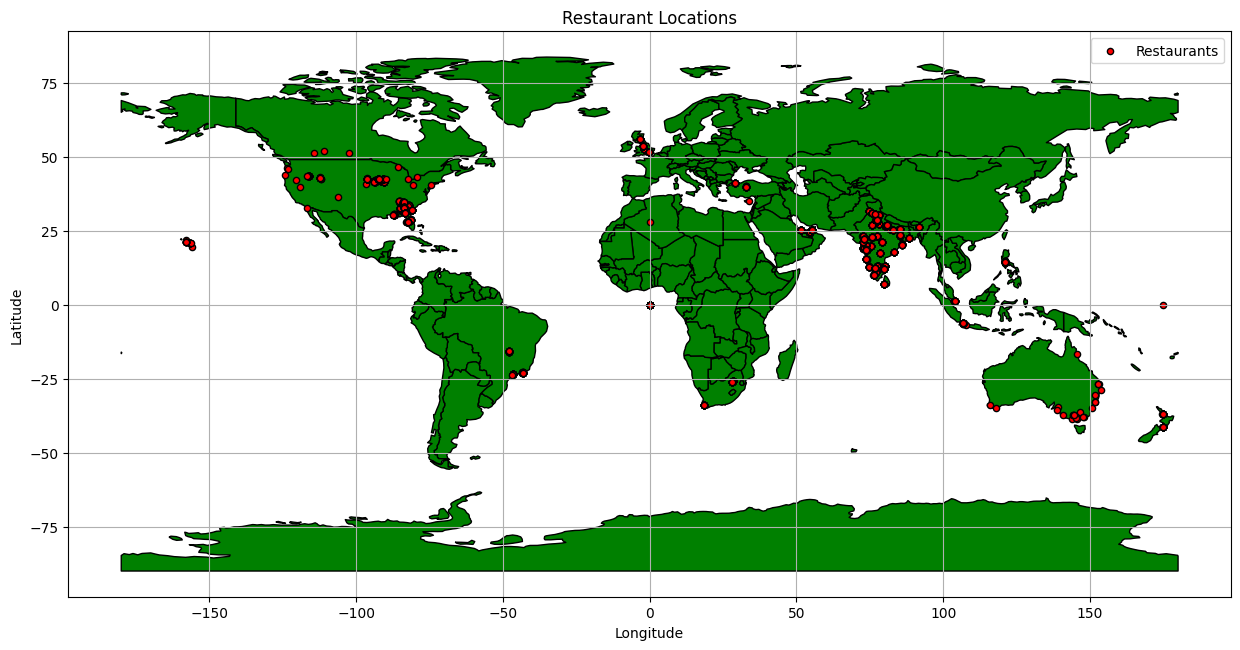

In [2]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(15, 15))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='green', edgecolor='black')
gdf.plot(ax=ax, markersize=20, edgecolor="black", color='red', marker='o', label='Restaurants')

plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

**Step 2:**Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.

In [3]:
restaurants_by_city = gdf.groupby('City')

restaurant_counts = restaurants_by_city.size()
for city, count in restaurant_counts.items():
    print(f"{city}: {count}")

Abu Dhabi: 20
Agra: 20
Ahmedabad: 21
Albany: 17
Allahabad: 20
Amritsar: 21
Ankara: 20
Armidale: 1
Athens: 20
Auckland: 20
Augusta: 20
Aurangabad: 20
Balingup: 1
Bandung: 1
Bangalore: 20
Beechworth: 1
Bhopal: 20
Bhubaneshwar: 21
Birmingham: 20
Bogor: 2
Boise: 20
Bras�_lia: 20
Cape Town: 20
Cedar Rapids/Iowa City: 20
Chandigarh: 18
Chatham-Kent: 1
Chennai: 20
Clatskanie: 1
Cochrane: 1
Coimbatore: 20
Colombo: 20
Columbus: 20
Consort: 1
Dalton: 20
Davenport: 20
Dehradun: 20
Des Moines: 20
Dicky Beach: 1
Doha: 20
Dubai: 20
Dubuque: 20
East Ballina: 1
Edinburgh: 20
Faridabad: 251
Fernley: 1
Flaxton: 1
Forrest: 1
Gainesville: 19
Ghaziabad: 25
Goa: 20
Gurgaon: 1118
Guwahati: 21
Hepburn Springs: 2
Huskisson: 1
Hyderabad: 18
Indore: 20
Inner City: 2
Inverloch: 1
Jaipur: 20
Jakarta: 16
Johannesburg: 6
Kanpur: 20
Kochi: 20
Kolkata: 20
Lakes Entrance: 1
Lakeview: 1
Lincoln: 1
London: 20
Lorn: 1
Lucknow: 21
Ludhiana: 20
Macedon: 1
Macon: 19
Makati City: 2
Manchester: 20
Mandaluyong City: 4
Mangalore

I split the cities in two groups to make its visualization easier.

In [4]:
# Split cities into two groups
half_idx = len(restaurant_counts) // 2
first_half_cities = restaurant_counts.index[:half_idx]
second_half_cities = restaurant_counts.index[half_idx:]

# Create separate dataframes for each group
first_half_data = restaurant_counts.loc[first_half_cities]
second_half_data = restaurant_counts.loc[second_half_cities]


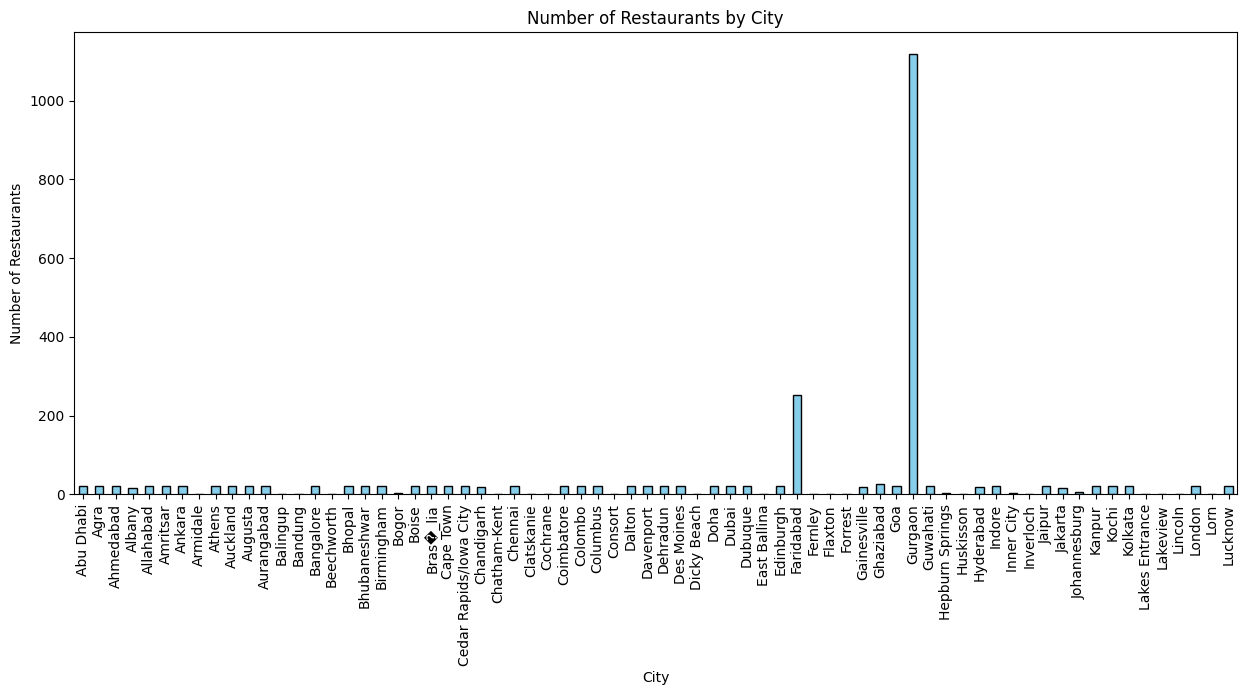

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
first_half_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

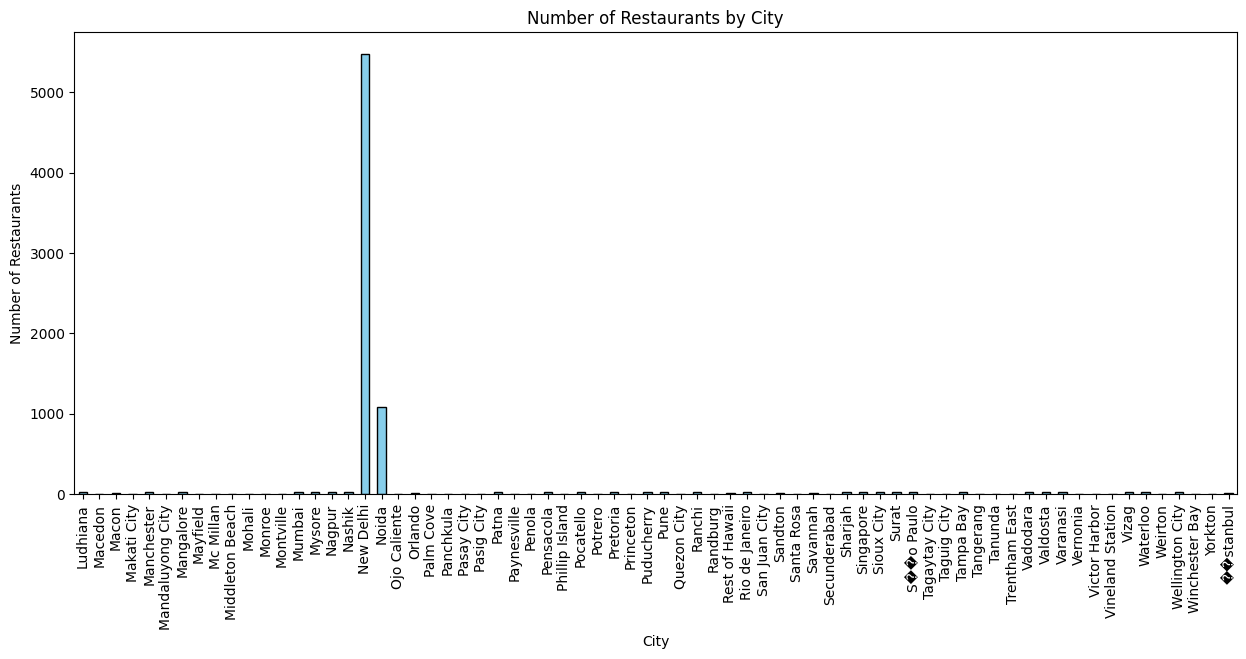

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
second_half_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

**Step 3:** Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.

In [7]:
restaurants_by_location = df.groupby('City')

location_stats = restaurants_by_location.agg({'Cuisines': lambda x: x.mode().iloc[0]})

location_stats.rename(columns={
    'Cuisines': 'Popular Cuisine',
}, inplace=True)

for city, cuisine in location_stats.iterrows():
    print(f"{city}: {cuisine['Popular Cuisine']}")


Abu Dhabi: American
Agra: North Indian, Mughlai
Ahmedabad: Cafe, American, Continental, Armenian, Fast Food
Albany: Japanese, Steak, Sushi
Allahabad: North Indian, Chinese
Amritsar: North Indian
Ankara: Kebab, Turkish Pizza
Armidale: Bar Food, Steak
Athens: American, Italian, Pizza
Auckland: Cafe
Augusta: Mexican
Aurangabad: North Indian
Balingup: Modern Australian
Bandung: Cafe, Coffee and Tea, Western
Bangalore: Pizza, Cafe, Italian
Beechworth: Pizza, Bar Food
Bhopal: Fast Food
Bhubaneshwar: Chinese
Birmingham: Italian
Bogor: Cafe, Desserts, Beverages
Boise: American, Bar Food
Bras�_lia: International
Cape Town: Burger, American
Cedar Rapids/Iowa City: American, Breakfast, Burger
Chandigarh: American, Cafe
Chatham-Kent: Japanese, Sushi
Chennai: North Indian, Mughlai, Chinese, South Indian
Clatskanie: American, Breakfast, Desserts
Cochrane: Asian, Japanese
Coimbatore: Bakery, Desserts
Colombo: American, Chinese, North Indian
Columbus: American
Consort: Chinese, Canadian
Dalton: Americ

**Step 4:** Identify any interesting insights or patterns related
to the locations of the restaurants.

In [8]:
city_with_most_restaurants = restaurant_counts.idxmax()
highest_restaurant_count = restaurant_counts.max()

city_with_least_restaurants = restaurant_counts.idxmin()
lowest_restaurant_count = restaurant_counts.min()

print(f"City with the highest number of restaurants: {city_with_most_restaurants} ({highest_restaurant_count} restaurants)")
print(f"City with the lowest number of restaurants: {city_with_least_restaurants} ({lowest_restaurant_count} restaurants)")

City with the highest number of restaurants: New Delhi (5473 restaurants)
City with the lowest number of restaurants: Armidale (1 restaurants)


Urban areas have more restaurants compared to rural areas. Cities like New Delhi, Gurgaon, and Faridabad have a large number of restaurants, while rural areas such as Armidale and Tanunda have fewer restaurants.